In [1]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20210104_matrices2/20210105_rqtl_geno_wscomposite_onlyflipfilter.csv'
phefile = '../data/20210106_standardised_pheno.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”
Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“1931 individuals with phenotypes but no genotypes
    43102|43202|43302|43402|43502|43602|43702|43802|45402|46002|47302|48802|49002|49402|49902|51802|55302|70802|75702|81802|82602|84802|87302|89702|90402|91002|92502|95602|101902|117602|123402|125602|126302|130102|131002|324003|324103|328303|328603|337903|347403|354903|329704|330004|335004|337404|342104|344304|349204|361004|362404|375204|611705|623505|634305|634505|634805|623305|842706|844606|844706|849906|850406|850506|852006|855906|857806|858006|858106|866406|910707|912007|913207|900507|900607|901107|901407|901907|902207|902607|902707|903007|903107|903307|903507|903707|903807|904307|904607|904907|905107|905407|906507|906607|906907|907007|907307|907707|907907|908007|908107|908407|908507|908707|908807|9089

 --Read the following data:
	 5287  individuals
	 1058  markers
	 4  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    5287 

    No. phenotypes:     4 
    Percent phenotyped: 100 92.6 100 95.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  53.4 
    Genotypes (%):      AA:27.0  AB:46.7  BB:26.3  not BB:0.0  not AA:0.0 

In [5]:
summary(datf2)

    F2 intercross

    No. individuals:    5287 

    No. phenotypes:     4 
    Percent phenotyped: 100 92.6 100 95.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  53.4 
    Genotypes (%):      AA:27.0  AB:46.7  BB:26.3  not BB:0.0  not AA:0.0 

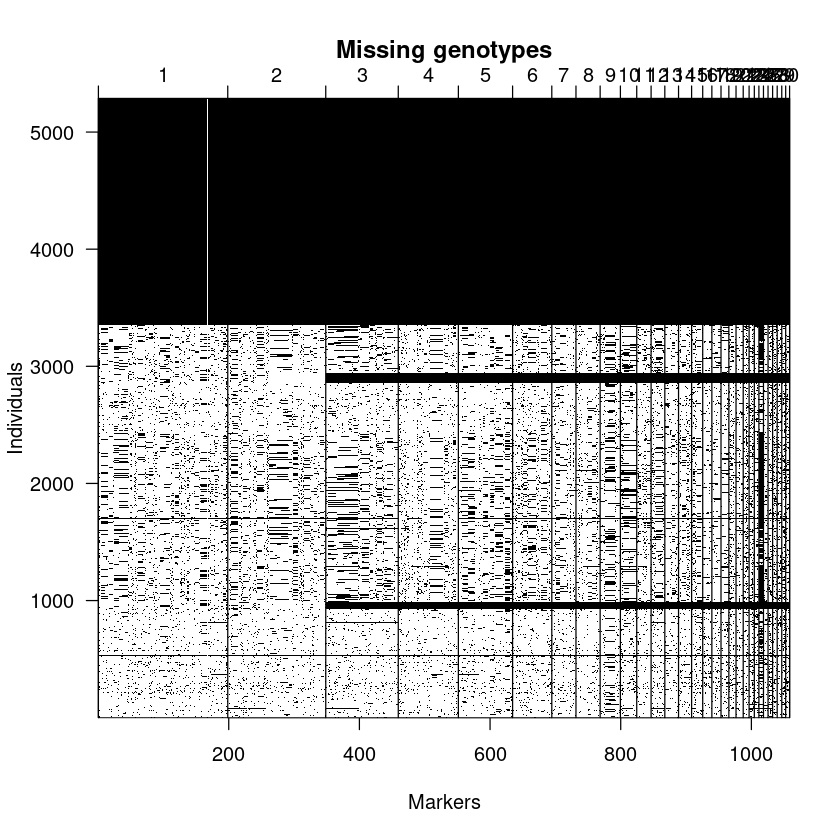

In [7]:
plotMissing(datf2)

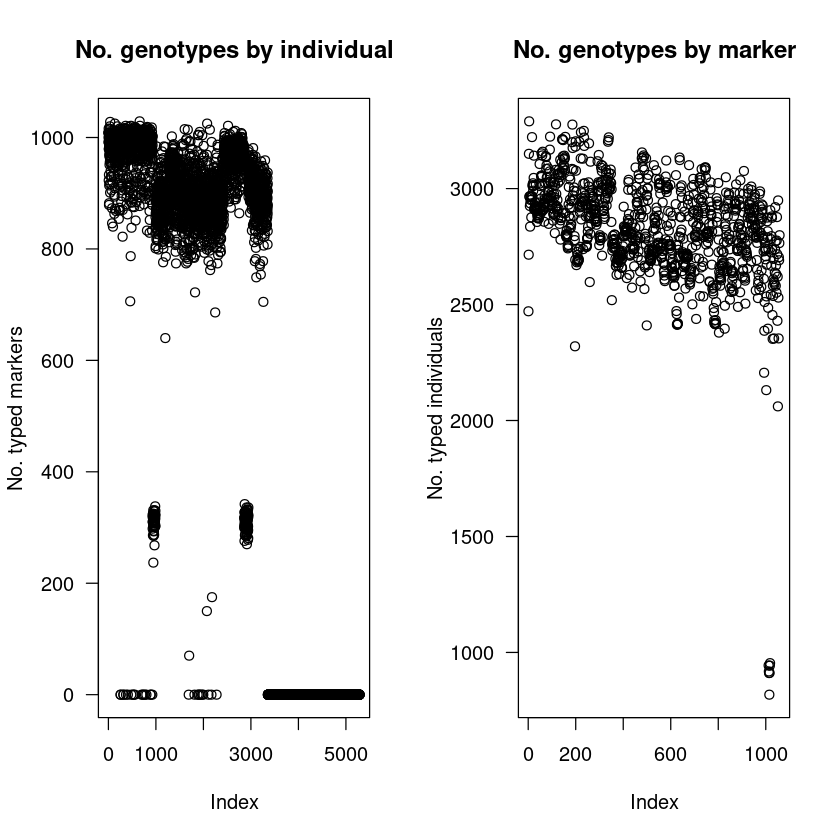

In [8]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [9]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [10]:
todrop

character(0)

In [11]:
datf2.1 <- drop.markers(datf2, todrop)

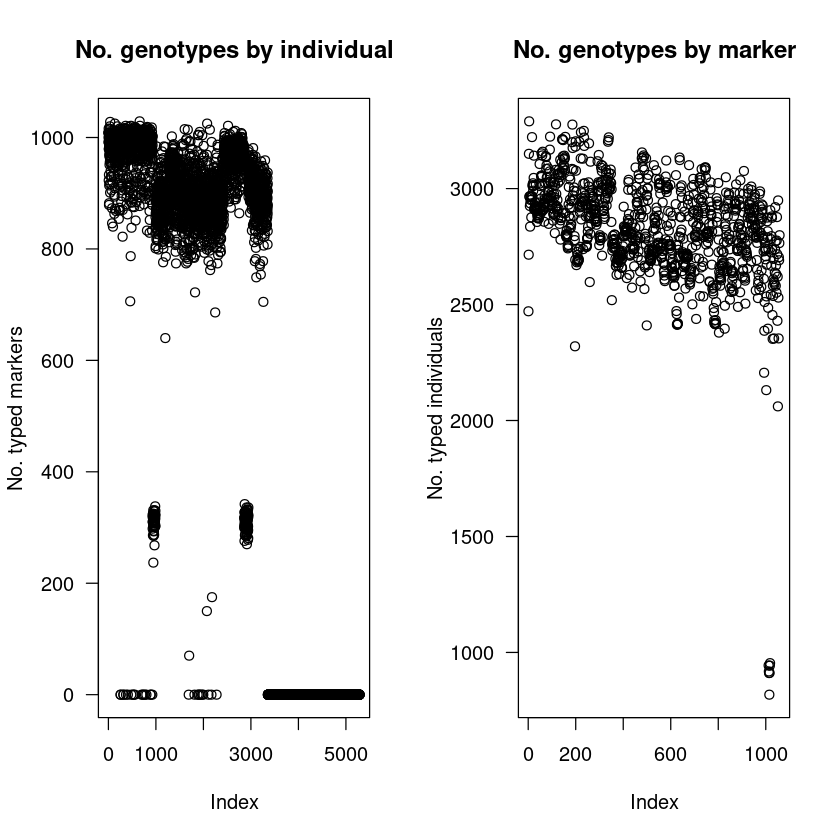

In [12]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [13]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>5)) # removing all individuals that have less than 0.5% of all markers
#datf2.2 <- datf2.1 # do not remove low marker individuals

In [14]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3327 

    No. phenotypes:     4 
    Percent phenotyped: 100 98.2 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  84.8 
    Genotypes (%):      AA:27.0  AB:46.7  BB:26.3  not BB:0.0  not AA:0.0 

In [25]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 5287

[1] 3327

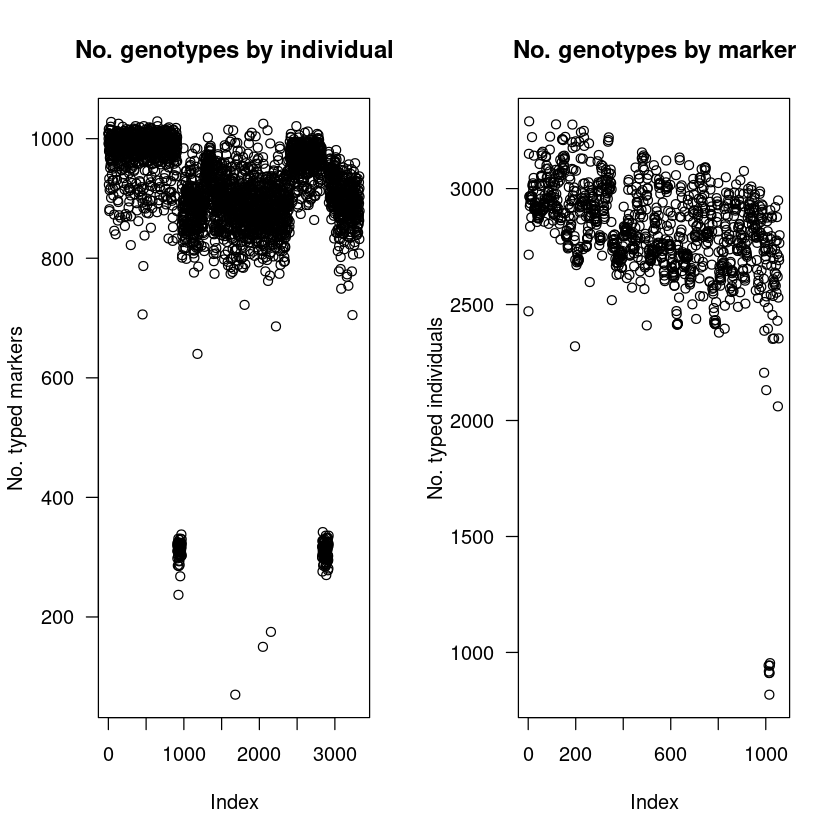

In [26]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [27]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3327 

    No. phenotypes:     4 
    Percent phenotyped: 100 98.2 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  84.8 
    Genotypes (%):      AA:27.0  AB:46.7  BB:26.3  not BB:0.0  not AA:0.0 

In [28]:
cg <- comparegeno(datf2.2)

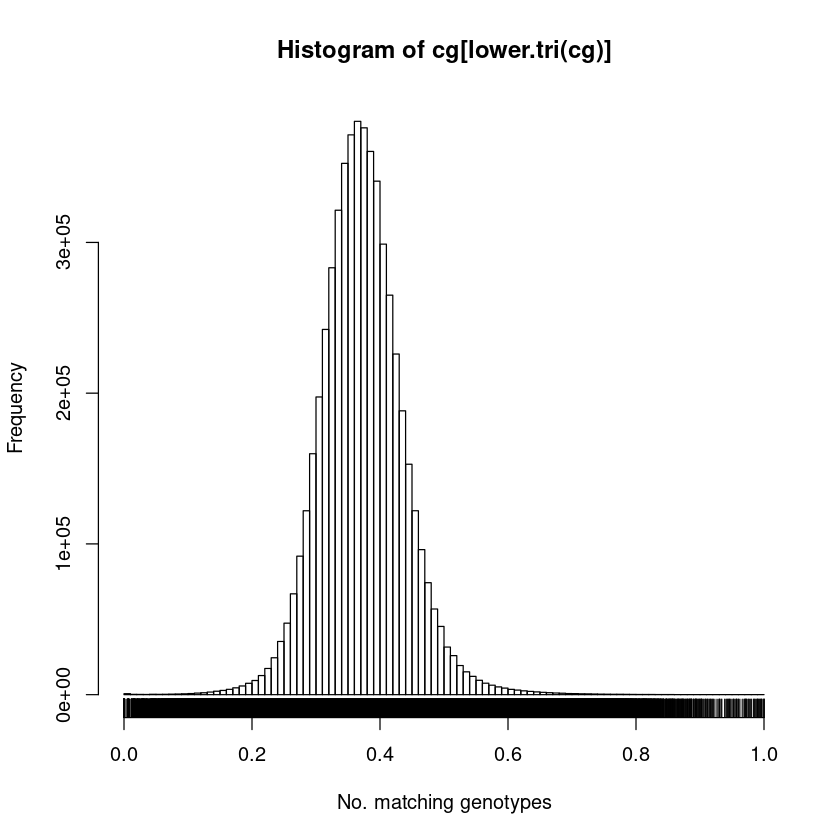

In [29]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [30]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [31]:
wh

,row,col
59402,7,965
100802,78,965
128402,112,965
99602,160,965
91202,364,965
40402,448,965
108202,453,965
58602,479,965
95102,672,965
101602,797,965


In [32]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`4-55`
[1] "4-56"

$`5-8`
[1] "5-9"

$`9-19`
[1] "9-18"



In [33]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”


In [34]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-0,1,856,495,1344,632,0,0,3.656995e-08
1-1,1,612,436,1356,923,0,0,1.152014e-38
1-2,1,177,521,1514,1115,0,0,2.128221e-50
1-3,1,37,615,1513,1162,0,0,7.998445e-45
1-4,1,361,561,1458,947,0,0,1.000770e-22
1-5,1,363,562,1478,924,0,0,6.227841e-20
1-6,1,402,554,1458,913,0,0,7.213652e-20
1-7,1,491,539,1417,880,0,0,1.559029e-18
1-8,1,391,587,1452,897,0,0,5.118093e-15


In [35]:
length(todrop)

[1] 743

In [36]:
datf2.3 <- datf2.2

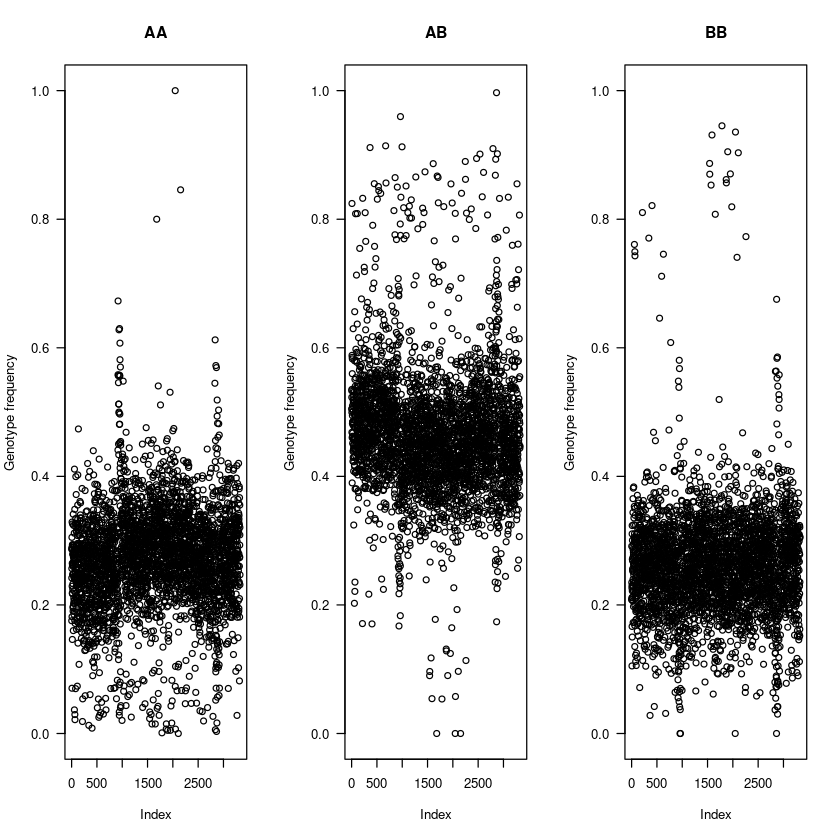

In [37]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

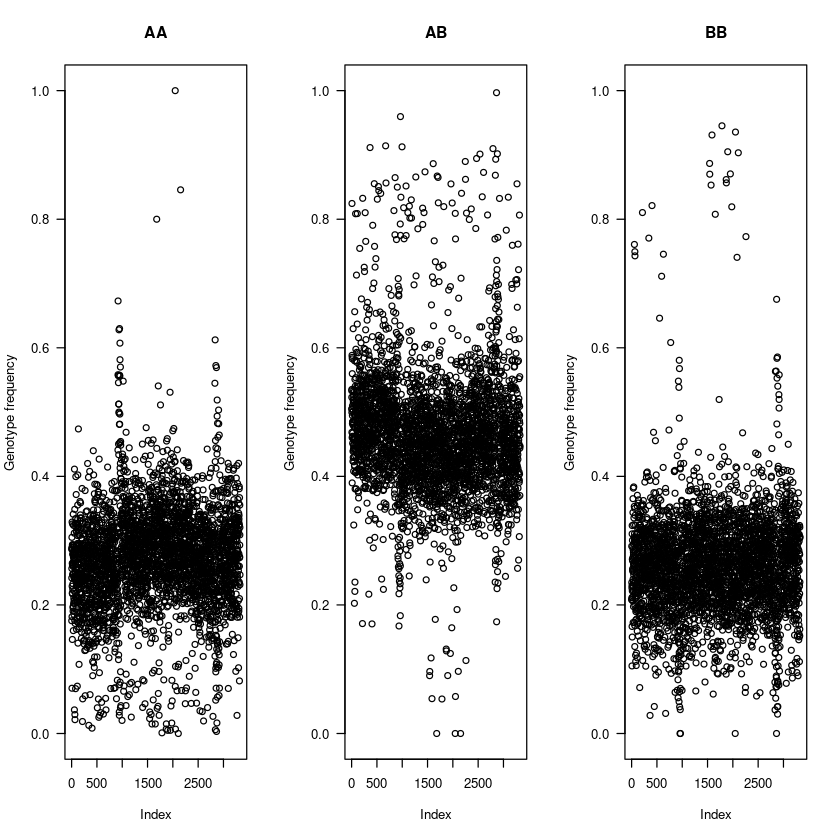

In [38]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [39]:
### do not filter for gfreq

In [40]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [41]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [42]:
datf2.4 <- datf2.3

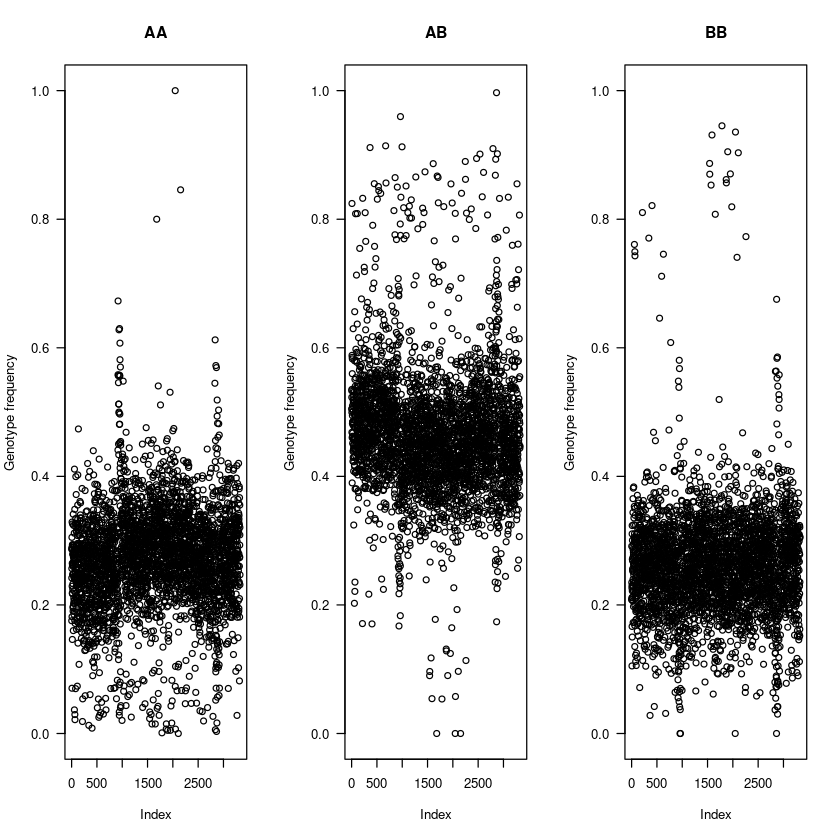

In [43]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [49]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

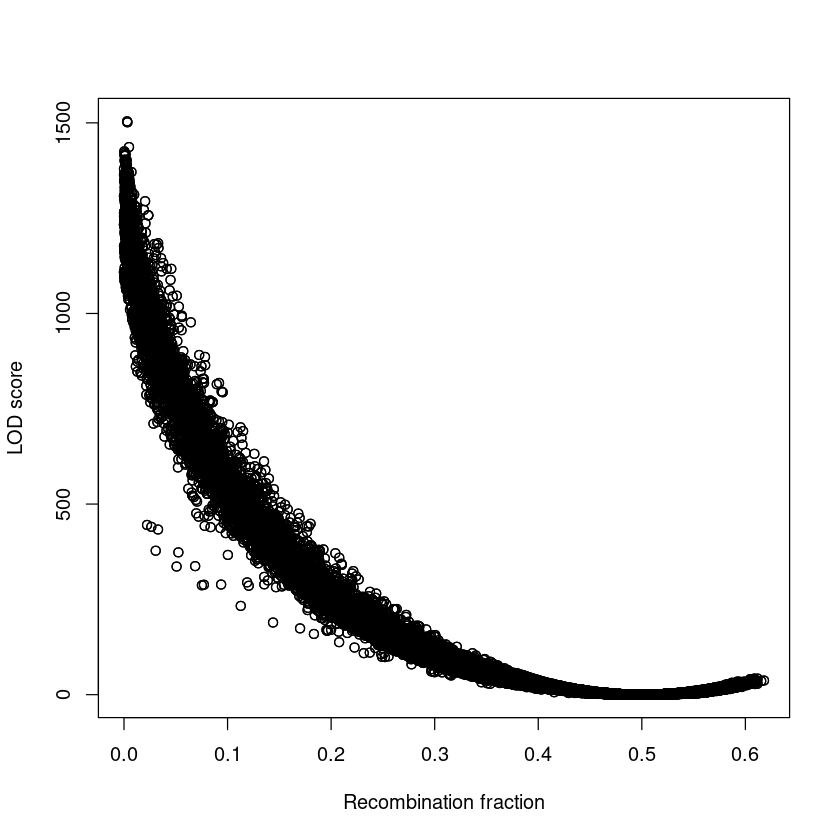

In [50]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

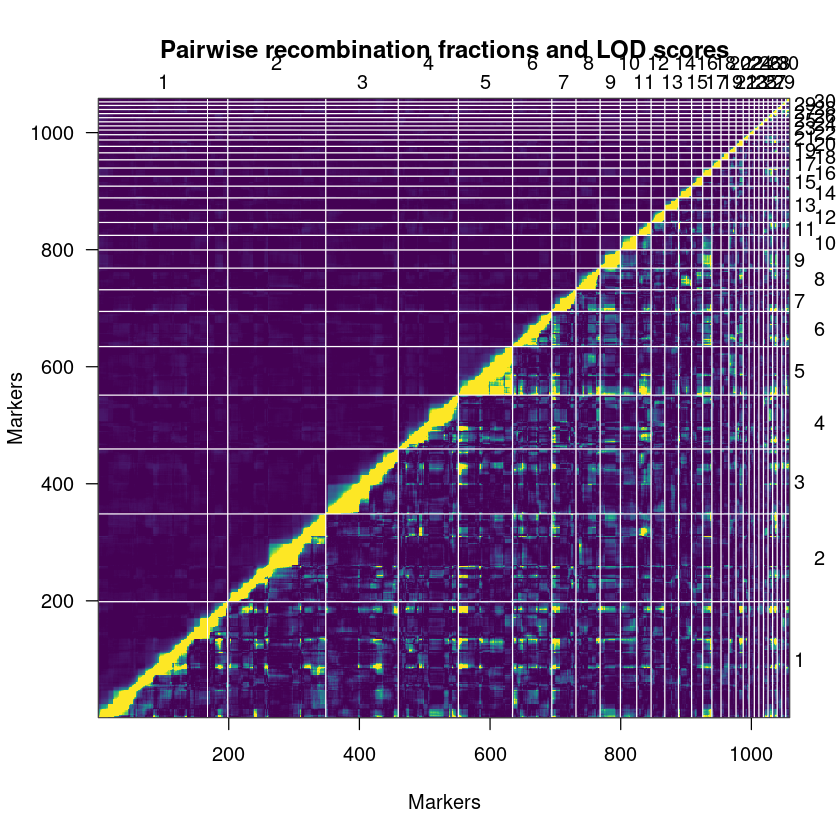

In [51]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [52]:
save.image('20210106_qtl_mapping.Rdata')

In [ ]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [ ]:
datf2.5 <- datf2.4

In [ ]:
plotPheno(datf2.2, pheno.col=2)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [ ]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [ ]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [ ]:
ac <- pull.pheno(datf2.5, c("SEX")) 

In [ ]:
out.hk.AC <- scanone(datf2.5, pheno.col =2, addcovar=ac,  method='hk') 

# get significance thresholds

In [ ]:
out.hk.ac.perm <- scanone(datf2.5, pheno.col = 2,  method='hk', addcovar=ac, n.perm = 10000) 

In [ ]:
datf2.5chr4 = subset(datf2.5, chr=4)
chr4ac = pull.pheno(datf2.5chr4, c("SEX")) 

In [ ]:
out.hk.ac.chr4.perm <- scanone(datf2.5chr4, pheno.col = 2, addcovar=chr4ac, method='hk', n.perm = 10000) 

In [ ]:
summary(out.hk.precor.perm)

In [ ]:
summary(out.hk.precor.chr4.perm)

In [ ]:
plot(out.hk.precor)
abline(h=3.8)
abline(h=2.7)

In [ ]:
save.image('20210106_qtl_mapping_with_map_and_results.Rdata')

In [ ]:
load('./sc')

# extract positions

In [ ]:
chrom <- summary(out.hk.precor, threshold = 3.8)$chr
pos <- summary(out.hk.precor, threshold = 3.8)$pos

In [ ]:
chrom_sugg <- summary(out.hk.precor, threshold = 2.7)$chr
pos_sugg <- summary(out.hk.precor, threshold = 2.7)$pos

In [ ]:
#summary(out.hk.precor, threshold = 2.7, format = 'allpeaks')

In [ ]:
plot(out.hk.precor, chr=4)

In [ ]:
qtls <- makeqtl(test2, chr = chrom_sugg, pos = pos_sugg, what = 'prob')

In [ ]:
fit_sugg <- fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests=TRUE)

In [ ]:
length(chrom_sugg)

In [ ]:
chrom <- chrom_sugg
pos <- pos_sugg
for (qtl in seq(1,10)){
    curr_chrom <- chrom[qtl]
    curr_pos <- pos[qtl]
    qtls <- makeqtl(test2, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(test2, pheno.col = 3, qtl = qtls, get.ests=TRUE, method = 'hk')
    print(summary(fit_sugg))
}

In [ ]:
#summary(fit_sugg)

In [ ]:
summary(out.hk.AC, threshold = 3.77, format = 'allpeaks')

In [ ]:
summary(out.hk.AC, threshold = 2.69, format = 'allpeaks')

In [ ]:
library('qtl')

# Cell Graveyard

# subset the data to only include Wahlberg F2s

In [ ]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [ ]:
idvec <- IDs[, 'V1']

In [ ]:
idvec <- as.double(idvec)

In [ ]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [ ]:
#subset
datf2= subset(datf2, ind = all_individs)

In [ ]:
summary(datf2)

# subset data to only include Wahlberg Markers

In [ ]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

In [ ]:
datf2 <- pull.markers(datf2, Wahlberg_bins$V2 )